# Plotting Rasters

There are many ways to make graphics with raster data - we can only touch on a few: base graphics, ggplot2 and leaflet (for HTML interactive graphics). Be sure to check out [RSeek.org](https://rseek.org/?q=display+a+raster) for finding examples.

## Install and load packages

In [2]:
# Load libraries
library(raster, warn.conflicts = FALSE)
library(ggplot2, warn.conflicts = FALSE)
library(leaflet, warn.conflicts = FALSE)
library(dplyr, warn.conflicts = FALSE)
library(remotes, warn.conflicts = FALSE)

# we only need to install these packages if you don't have them already
# rgdal is used to support geospatial data I/O
installed_packages_names <- rownames(installed.packages())
if (!"ohwobpg" %in% installed_packages_names) remotes::install_github("BigelowLab/ohwobpg", force = TRUE, quiet = TRUE)
if (!"rgdal" %in% installed_packages_names) install.packages("rgdal")

# Load ohwobpg package
library(ohwobpg, warn.conflicts = FALSE)

## Initialize raster for visualization

Once the necessary packages are loaded, we will start by creating a raster object from a pre-loaded ohwobpg database.  Specifically, we will be creating a raster object of sea surface temperature (SST) data for June of 2018.

In [3]:
# Load database
path <- system.file("gom", package = "ohwobpg")
db <- read_database(path)

# Subset database
par_db <- db %>%
  dplyr::filter(param == "sst" &
                per == "MO" &
                dplyr::between(date, as.Date("2018-05-15"), as.Date("2018-09-26")))

# Create raster stack
par <- par_db %>%                # start with the subset database
  as_filename(path = path) %>%   # build filenames and append to the path
  raster::stack()                # read them into a stack of images

# Name layers
names(par) <- format(par_db$date, "%b")

# Isolate June
r <- par$Jun

## Plot rasters using base plot

Next, we will plot the June 2018 SST raster object using the base R plot() function.  We simply call the plot() function with the raster object as the argument.  For more options to make fancier plots with base plot and a more detailed example, see https://www.neonscience.org/dc-plot-raster-data-r.

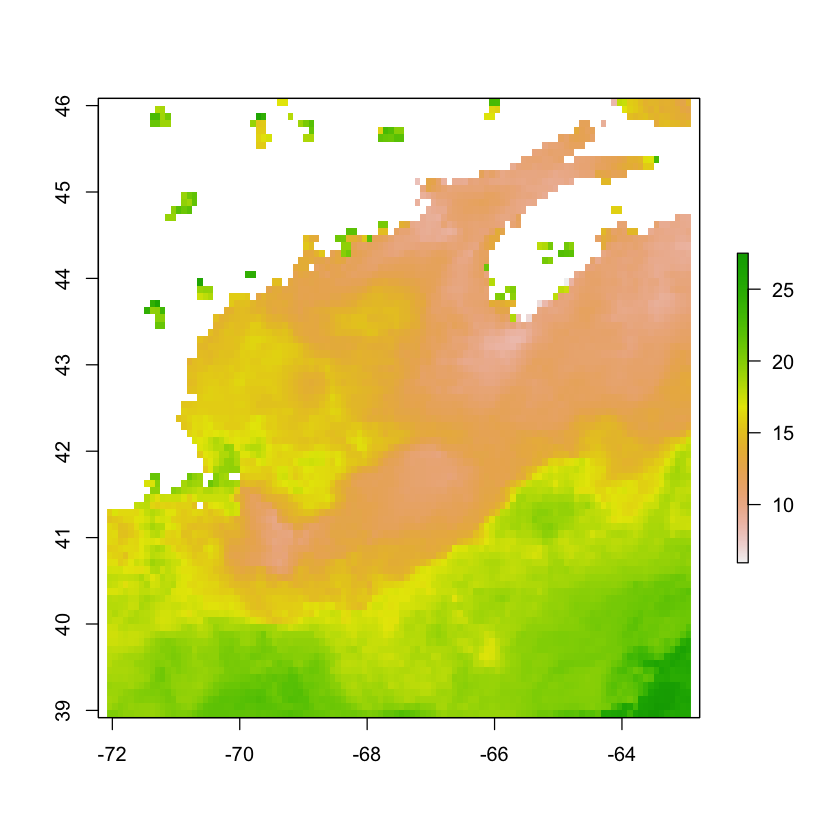

In [4]:
plot(r)

## Plot rasters using ggplot2

Next, we will plot the same raster object using the package ggplot2.  First, the user needs to convert the raster object to a dataframe with coordinates, using as.data.frame(*raster*, xy = TRUE).  Next, the dataframe can be plotted using geom_tile().  For an in-depth example of how to plot a raster using ggplot2 and geom_tile(), see https://ggplot2.tidyverse.org/reference/geom_tile.html.

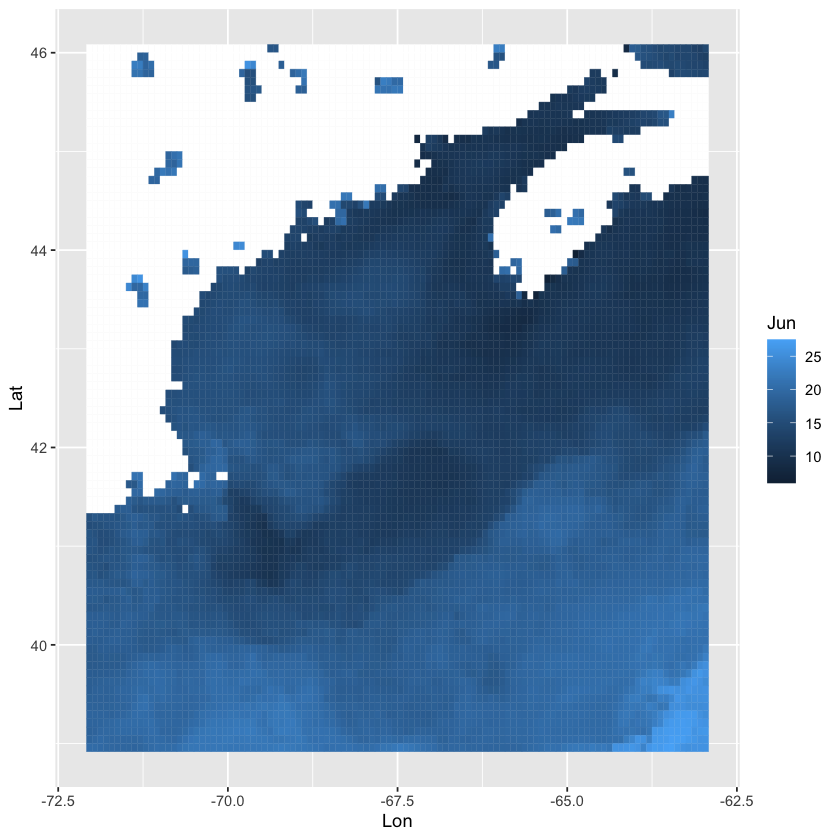

In [5]:
# Convert raster to dataframe
r_df <- as.data.frame(r, xy = TRUE)
# Plot dataframe using ggplot2
ggplot(data = r_df, mapping = aes(x = x, y = y, color = Jun, fill = Jun)) +
  # Add raster data
  geom_tile() +
  # Change NA fill color to white
  scale_fill_continuous(na.value = "white") +
  scale_color_continuous(na.value = "white") +
  # Add axes labels
  labs(x = "Lon",
       y = "Lat")

## Plot rasters using leaflet

Finally, we will plot the raster object on a leaflet interactive map.  The leaflet::addRasterImage() function allows the user to plot raster objects on the map.  For a more detailed example, see https://rstudio.github.io/leaflet/raster.html.

Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded ellps WGS 84 in CRS definition: +proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs”
Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded datum WGS_1984 in CRS definition”
Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded ellps WGS 84 in CRS definition: +proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs”
Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded datum WGS_1984 in CRS definition”


HTML widgets cannot be represented in plain text (need html)
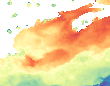

In [6]:
leaflet::leaflet() %>% leaflet::addTiles(group = "Standard") %>%
            # Add satellite imagery
            leaflet::addProviderTiles('Esri.WorldImagery', group = "Satellite") %>%
            # Define bounds
            leaflet::fitBounds(lng1 = min(r_df$x),
                               lat1 = min(r_df$y),
                               lng2 = max(r_df$x),
                               lat2 = max(r_df$y)) %>%
            # Add raster data
            leaflet::addRasterImage(r)